<a href="https://colab.research.google.com/github/nyksrox/NIKHILR/blob/master/Balancing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
from datetime import datetime


In [ ]:
data = pd.read_csv("C:\\Users\\nikhilran\\Desktop\\HealthCareExperiments\\N\\JMH_Data_V1.csv")

In [ ]:
data['LIST DT']=pd.to_datetime(data['LIST DT'])
data['LIST DT'] = data['LIST DT'].apply(lambda x: x.toordinal())

data['ADMIT DT']=pd.to_datetime(data['ADMIT DT'])
data['ADMIT DT'] = data['ADMIT DT'].apply(lambda x: x.toordinal())

data['DSCHG DT']=pd.to_datetime(data['DSCHG DT'])
data['DSCHG DT'] = data['DSCHG DT'].apply(lambda x: x.toordinal())

data['DOB']=pd.to_datetime(data['DOB'])
data['DOB'] = data['DOB'].apply(lambda x: x.toordinal())

In [ ]:
##data =data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]

In [ ]:
print(data.dtypes)

FACS #               int64
CALLS                int64
DU413_CALLS          int64
ZIP5               float64
DOB                  int64
INIT BAL           float64
CHARGES            float64
PT SEX               int64
LIST DT              int64
PT AREA            float64
RP AREA            float64
SEED #               int64
ADMIT DT             int64
DSCHG DT             int64
TU SCORE             int64
BNKCRD AVLBLE        int64
AMT PDUE 12 MNT      int64
NUM DEROGAT ITM      int64
LOCATION CODE        int64
F/C                  int64
ACCOUNT TYPE         int64
DOD                float64
BCARD HIGH CRDT      int64
AGENCY CODE          int64
PAT TOT PMTS       float64
PAT TOT ADJS       float64
ALL INS PMTS       float64
ALL INS ADJS       float64
ACCT TOT CHRGS     float64
Total Paid         float64
Service Type         int64
DRG CODE           float64
IA SCORE             int64
Payment Status       int64
dtype: object


In [ ]:
#d = datetime.strptime(data['LIST DT'], '%Y-%m-%d').date()
#data['LIST DT']=pd.to_datetime(data['LIST DT'])
#data['LIST DT'] = data['LIST DT'].toordinal()



In [ ]:
#data['LIST DT'] = data['LIST DT'].apply(lambda x: x.toordinal())

In [ ]:
#data['ADMIT DT']=pd.to_datetime(data['ADMIT DT'])
#data['ADMIT DT'] = data['ADMIT DT'].apply(lambda x: x.toordinal())

In [ ]:
#data['DSCHG DT']=pd.to_datetime(data['DSCHG DT'])
#data['DSCHG DT'] = data['DSCHG DT'].apply(lambda x: x.toordinal())

In [ ]:
#data['DOB']=pd.to_datetime(data['DOB'])
#data['DOB'] = data['DOB'].apply(lambda x: x.toordinal())

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
data0 = pd.DataFrame(imp.fit_transform(data),columns=data.columns, index=data.index)
#print(imp.fit_transform(data))

In [ ]:
print(data0.dtypes)

FACS #             float64
CALLS              float64
DU413_CALLS        float64
ZIP5               float64
DOB                float64
INIT BAL           float64
CHARGES            float64
PT SEX             float64
LIST DT            float64
PT AREA            float64
RP AREA            float64
SEED #             float64
ADMIT DT           float64
DSCHG DT           float64
TU SCORE           float64
BNKCRD AVLBLE      float64
AMT PDUE 12 MNT    float64
NUM DEROGAT ITM    float64
LOCATION CODE      float64
F/C                float64
ACCOUNT TYPE       float64
DOD                float64
BCARD HIGH CRDT    float64
AGENCY CODE        float64
PAT TOT PMTS       float64
PAT TOT ADJS       float64
ALL INS PMTS       float64
ALL INS ADJS       float64
ACCT TOT CHRGS     float64
Total Paid         float64
Service Type       float64
DRG CODE           float64
IA SCORE           float64
Payment Status     float64
dtype: object


In [ ]:
#data3 = data0.drop(columns=['ACCIDENT DATE'])
#data2 = data0.drop(columns=['INS CO PHONE#'])
#data1 = data2.drop(columns=['RP PF'])

data1 = data0



In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(data1['Payment Status']==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(data1['Payment Status']==0)))



Before OverSampling, counts of label '1': 7793
Before OverSampling, counts of label '0': 48323 



In [ ]:
# Separate majority and minority classes
df_majority = data1[data1['Payment Status']==0]
df_minority = data1[data1['Payment Status']==1]

In [ ]:
from sklearn.utils import resample

In [ ]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=48323,    # to match majority class
                                 random_state=123) # reproducible results

In [ ]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])


In [ ]:
print(df_upsampled.head())

       FACS #  CALLS  DU413_CALLS     ZIP5       DOB  INIT BAL   CHARGES  \
1  46504655.0    1.0          4.0  33193.0  719897.0    595.00  31697.50   
2  46504667.0    0.0          1.0  33055.0  711556.0   1316.00  29164.35   
4  46504676.0    0.0          4.0  33168.0  722419.0    887.46  55061.59   
5  46504678.0    0.0          0.0  33056.0  712759.0   1316.90  30128.98   
7  46504786.0    0.0         10.0  33167.0  730851.0   9384.00  65317.00   

   PT SEX   LIST DT  PT AREA  ...  PAT TOT PMTS  PAT TOT ADJS  ALL INS PMTS  \
1     1.0  736696.0    305.0  ...         -5.00     -31097.50          0.00   
2     1.0  736696.0    305.0  ...     -10419.60     -17428.75     -10419.60   
4     0.0  736696.0    786.0  ...      -5887.54     -48286.59      -5887.54   
5     1.0  736696.0    786.0  ...     -11629.85     -17183.13     -11629.85   
7     1.0  736696.0    305.0  ...          0.00     -55933.00          0.00   

   ALL INS ADJS  ACCT TOT CHRGS  Total Paid  Service Type  DRG CODE 

In [ ]:
print("After OverSampling, counts of label '1': {}".format(sum(df_upsampled['Payment Status']==1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(df_upsampled['Payment Status']==0)))

After OverSampling, counts of label '1': 48323
After OverSampling, counts of label '0': 48323 



In [ ]:
X = df_upsampled.drop(columns=['Payment Status'])
#x = x1.drop(columns=['IA SCORE'])

In [ ]:
y = df_upsampled['Payment Status']

In [ ]:
print(X.head())

       FACS #  CALLS  DU413_CALLS     ZIP5       DOB  INIT BAL   CHARGES  \
0  46653954.0    4.0          0.0  33142.0  717044.0   1039.29   3464.30   
1  46504655.0    1.0          4.0  33193.0  719897.0    595.00  31697.50   
2  46504667.0    0.0          1.0  33055.0  711556.0   1316.00  29164.35   
3  46504673.0    0.0          1.0  33138.0  716533.0   5901.69  79677.58   
4  46504676.0    0.0          4.0  33168.0  722419.0    887.46  55061.59   

   PT SEX   LIST DT  PT AREA  ...  AGENCY CODE  PAT TOT PMTS  PAT TOT ADJS  \
0     1.0  736773.0    786.0  ...          1.0          0.00          0.00   
1     1.0  736696.0    305.0  ...          1.0         -5.00     -31097.50   
2     1.0  736696.0    305.0  ...          0.0     -10419.60     -17428.75   
3     0.0  736696.0    786.0  ...          0.0     -49872.62     -23903.27   
4     0.0  736696.0    786.0  ...          0.0      -5887.54     -48286.59   

   ALL INS PMTS  ALL INS ADJS  ACCT TOT CHRGS  Total Paid  Service Type  \

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)

C:\ProgramData\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [ ]:
#float_formatter = "{:.2f}".format

In [ ]:
#np.set_printoptions(formatter={'float_kind':float_formatter})

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
 #y_new = np.round(y_pred,2)

In [ ]:
#y_pred.to_frame()
#print(y_pred)
np.savetxt("C:\\Users\\nikhilran\\Desktop\\HealthCareExperiments\\N\\testPrediction1.csv",y_new, delimiter=",")

In [ ]:
np.savetxt("C:\\Users\\nikhilran\\Desktop\\HealthCareExperiments\\N\\testVariables.csv",X_test, delimiter=",")

In [ ]:
from sklearn import metrics

In [ ]:
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("Precision:",metrics.precision_score(y_test, y_pred))
#print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy = metrics.accuracy_score(y_test,y_pred)
acc = Accuracy*100

In [ ]:
print("Accuracy:",acc,"%")

Accuracy: 69.99749169122718 %


In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[13536  2464]
 [ 7105  8789]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

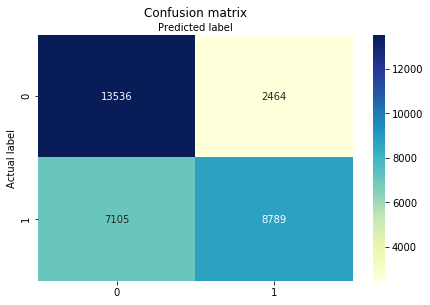

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
selector = RFE(clf,n_features_to_select=1)

selector = selector.fit(X_train,y_train)

In [ ]:
order = selector.ranking_

AttributeError: 'RFE' object has no attribute 'ranking_'